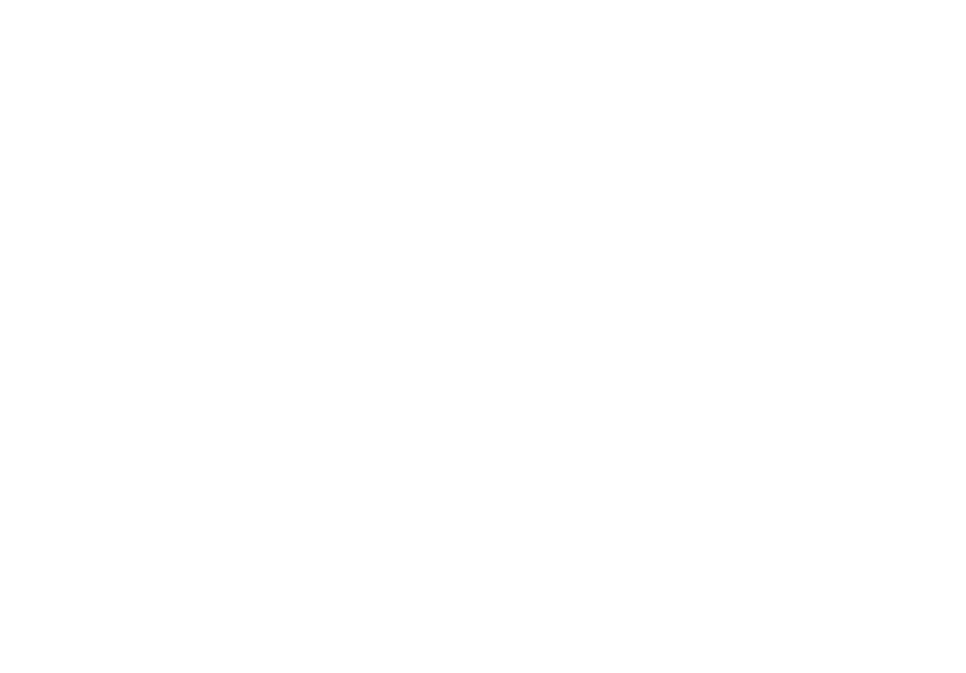

## import libraries

In [19]:
"""
Re‑creates your current world + camera demo and opens a matplotlib window.
Run:  python -m examples.demo_world
"""
import numpy as np
from nerflab import (
    Intrinsics, Camera, Box, Sphere, World, cartesian_to_spherical,
    stratified_samples_batch, plot_world, CFG, pose_H, make_pose_cases
)


## Part1: Given camera intrinsics, camera pose -> camera rays with respect to the world

In [25]:
print(CFG.intrinsics)

IntrinsicsCfg(fx=1200, fy=1200, width=640, height=480)


In [26]:
# build preset dictionary
cases = make_pose_cases(axis_dist=10)

# pick a view (e.g., diagonal)
H_wc = pose_H(cases["+Z"])  
print(H_wc)

[[ 1.  0. -0.  0.]
 [-0.  1. -0.  0.]
 [ 0.  0.  1. 10.]
 [ 0.  0.  0.  1.]]


In [27]:
# --- camera ------------------------------------------------------------------
# H_wc = np.eye(4, dtype=np.float32)        # simple origin‑facing camera
intr  = Intrinsics(**CFG.intrinsics.__dict__)
cam   = Camera(intr, H_wc,
               t_bounds=(CFG.rays.t_near, CFG.rays.t_far))

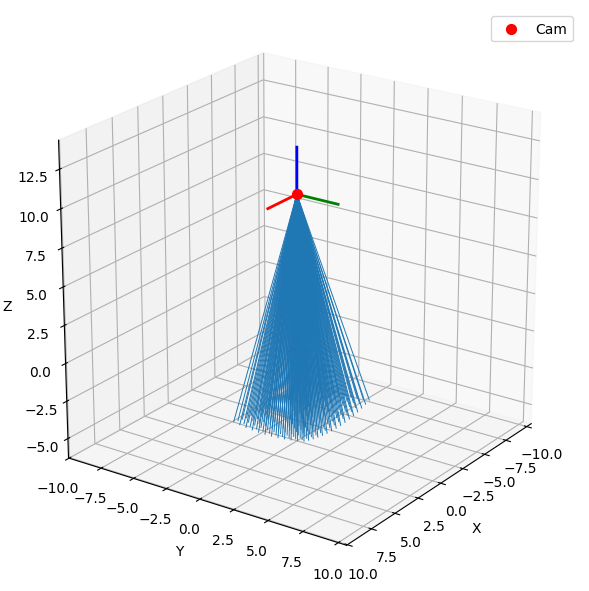

In [28]:
cam.plot_rays()

In [29]:
cam.print_info()

=== Camera ===
Res: 480 x 640
fx, fy: 1200.00, 1200.00
cx, cy: 320.00, 240.00
t_bounds: [10, 15]
H_wc:
 [[ 1.  0. -0.  0.]
 [-0.  1. -0.  0.]
 [ 0.  0.  1. 10.]
 [ 0.  0.  0.  1.]]
